<a href="https://colab.research.google.com/github/manoj-73/Stock-Analyzing-using-ML-/blob/main/STOCK_ANALYZING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching Live Tata Stocks Data - 2025-10-27 13:04:51
TATASTEEL       ₹  176.66 | Change: +2.22 (+1.27%)


ERROR:yfinance:$TATAMOTORS.NS: possibly delisted; no price data found  (period=1d)


TCS             ₹ 3083.00 | Change: +19.80 (+0.65%)
TATAPOWER       ₹  400.30 | Change: +3.45 (+0.87%)
TATACONSUM      ₹ 1169.90 | Change: +14.60 (+1.26%)
TATAELXSI       ₹ 5585.50 | Change: +41.50 (+0.75%)
TITAN           ₹ 3733.00 | Change: +18.10 (+0.49%)
TATACOMM        ₹ 1936.40 | Change: +40.40 (+2.13%)
VOLTAS          ₹ 1429.00 | Change: -12.40 (-0.86%)
TRENT           ₹ 4800.00 | Change: +10.40 (+0.22%)

Tata Stocks Summary:
     Stock        Symbol  Current Price  Previous Close  Change  Change %  Volume
 TATASTEEL  TATASTEEL.NS         176.66          174.44    2.22      1.27   94961
       TCS        TCS.NS        3083.00         3063.20   19.80      0.65   18433
 TATAPOWER  TATAPOWER.NS         400.30          396.85    3.45      0.87   12814
TATACONSUM TATACONSUM.NS        1169.90         1155.30   14.60      1.26    3616
 TATAELXSI  TATAELXSI.NS        5585.50         5544.00   41.50      0.75     946
     TITAN      TITAN.NS        3733.00         3714.90   18.10      0.

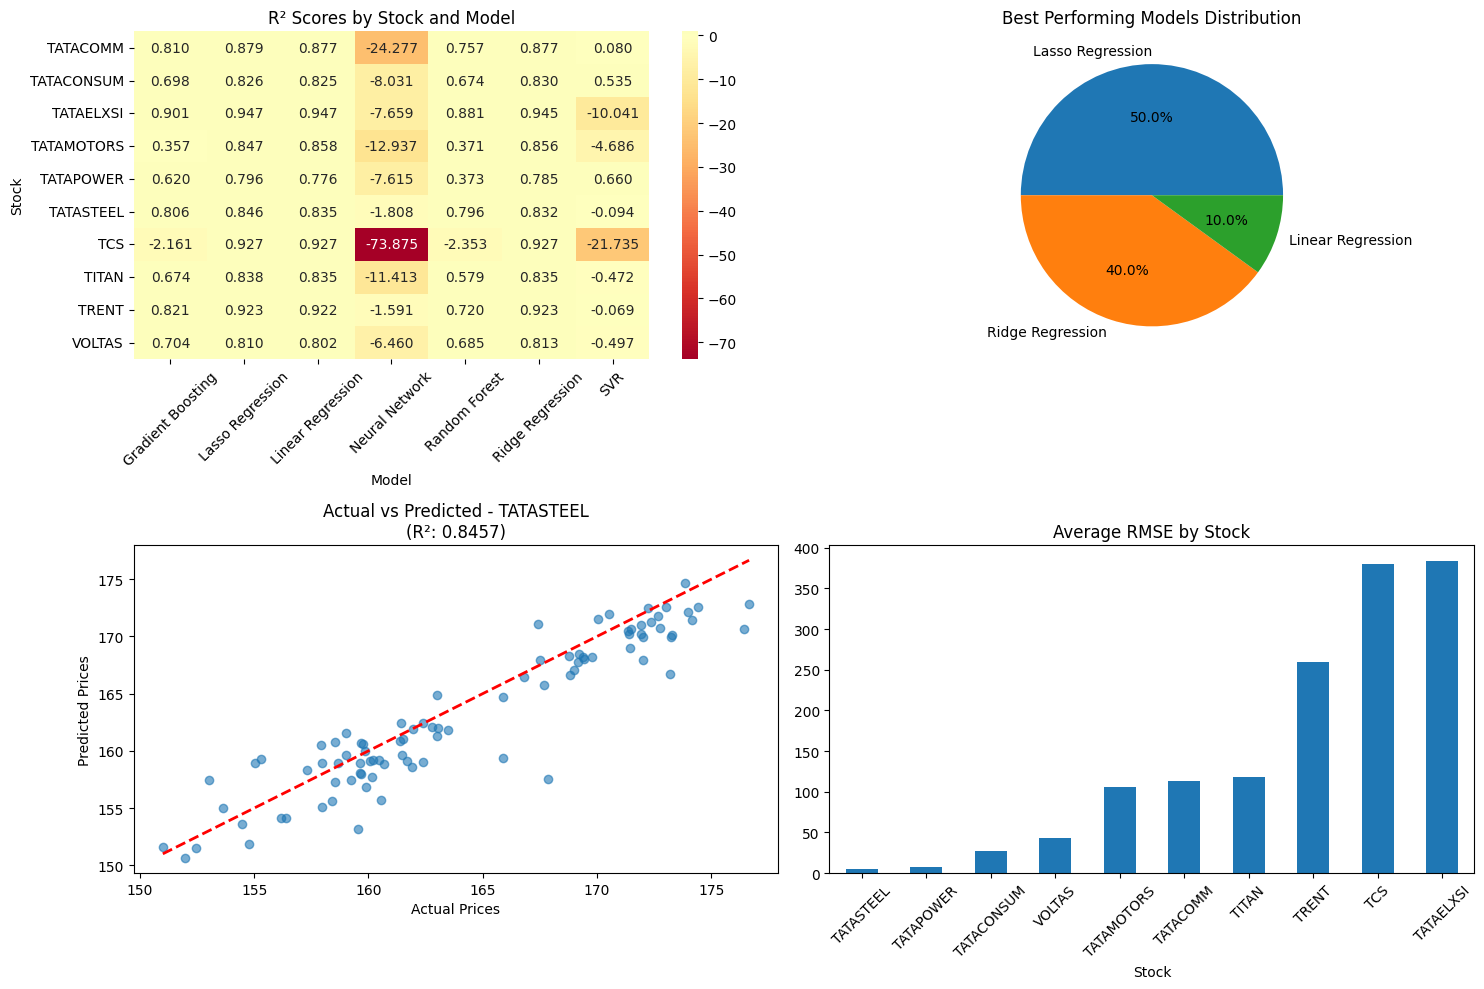


TRADING RECOMMENDATIONS
     Stock  Current Price Recommendation Confidence       Best Model Model R²
 TATASTEEL         176.66           SELL      84.6% Lasso Regression   0.8457
       TCS        3083.00           HOLD      74.2% Ridge Regression   0.9273
 TATAPOWER         400.30           HOLD      63.7% Lasso Regression   0.7964
TATACONSUM        1169.90           HOLD      66.4% Ridge Regression   0.8296
 TATAELXSI        5585.50           HOLD      75.8% Lasso Regression   0.9472
     TITAN        3733.00           HOLD      67.1% Lasso Regression   0.8383
  TATACOMM        1936.40           SELL      87.9% Lasso Regression   0.8786
    VOLTAS        1429.00           HOLD      65.0% Ridge Regression   0.8128
     TRENT        4800.00           HOLD      73.8% Ridge Regression   0.9231

KEY INSIGHTS
1. Models with R² > 0.8 indicate strong predictive power
2. Lower RMSE values indicate better prediction accuracy
3. Consider combining multiple models for robust predictions
4. Alw

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

def get_tata_stocks():
    # Tata group stock symbols
    tata_stocks = {
        'TATASTEEL': 'TATASTEEL.NS',
        'TATAMOTORS': 'TATAMOTORS.NS',
        'TCS': 'TCS.NS',
        'TATAPOWER': 'TATAPOWER.NS',
        'TATACONSUM': 'TATACONSUM.NS',
        'TATAELXSI': 'TATAELXSI.NS',
        'TITAN': 'TITAN.NS',
        'TATACOMM': 'TATACOMM.NS',
        'VOLTAS': 'VOLTAS.NS',
        'TRENT': 'TRENT.NS'
    }

    print(f"Fetching Live Tata Stocks Data - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print("=" * 80)

    stock_data = []

    for name, symbol in tata_stocks.items():
        try:
            stock = yf.Ticker(symbol)
            info = stock.info
            history = stock.history(period='1d', interval='1m')

            if not history.empty:
                current_price = history['Close'].iloc[-1]
                previous_close = info.get('previousClose', current_price)
                change = current_price - previous_close
                change_percent = (change / previous_close) * 100

                stock_data.append({
                    'Stock': name,
                    'Symbol': symbol,
                    'Current Price': round(current_price, 2),
                    'Previous Close': round(previous_close, 2),
                    'Change': round(change, 2),
                    'Change %': round(change_percent, 2),
                    'Volume': history['Volume'].iloc[-1] if 'Volume' in history else 0
                })

                print(f"{name:15} ₹{current_price:8.2f} | Change: {change:+.2f} ({change_percent:+.2f}%)")

        except Exception as e:
            print(f"Error fetching {name}: {e}")

    return pd.DataFrame(stock_data), tata_stocks

def get_historical_data(symbol, period="2y"):
    """Fetch historical data for ML analysis"""
    stock = yf.Ticker(symbol)
    hist = stock.history(period=period)
    return hist

def create_features(df):
    """Create technical indicators and features for ML models"""
    df = df.copy()

    # Price-based features
    df['Price_Range'] = df['High'] - df['Low']
    df['Gap'] = df['Open'] - df['Close'].shift(1)
    df['Body'] = abs(df['Close'] - df['Open'])

    # Moving averages
    df['MA_5'] = df['Close'].rolling(window=5).mean()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_20'] = df['Close'].rolling(window=20).mean()
    df['MA_50'] = df['Close'].rolling(window=50).mean()

    # Price relative to moving averages
    df['Price_MA5_Ratio'] = df['Close'] / df['MA_5']
    df['Price_MA20_Ratio'] = df['Close'] / df['MA_20']

    # Volatility features
    df['Volatility_5'] = df['Close'].rolling(window=5).std()
    df['Volatility_20'] = df['Close'].rolling(window=20).std()

    # Momentum indicators
    df['Momentum_5'] = df['Close'] - df['Close'].shift(5)
    df['Momentum_10'] = df['Close'] - df['Close'].shift(10)

    # RSI
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    exp1 = df['Close'].ewm(span=12).mean()
    exp2 = df['Close'].ewm(span=26).mean()
    df['MACD'] = exp1 - exp2
    df['MACD_Signal'] = df['MACD'].ewm(span=9).mean()

    # Volume features
    df['Volume_MA_5'] = df['Volume'].rolling(window=5).mean()
    df['Volume_Ratio'] = df['Volume'] / df['Volume_MA_5']

    # Target variable (next day's closing price)
    df['Target'] = df['Close'].shift(-1)

    # Drop NaN values
    df = df.dropna()

    return df

def prepare_ml_data(df):
    """Prepare data for machine learning models"""
    feature_columns = [col for col in df.columns if col not in ['Target', 'Open', 'High', 'Low', 'Close', 'Volume']]

    X = df[feature_columns]
    y = df['Target']

    return X, y, feature_columns

def evaluate_model(y_true, y_pred, model_name):
    """Evaluate model performance"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return {
        'Model': model_name,
        'MAE': round(mae, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'R2': round(r2, 4)
    }

def train_ml_models(X_train, X_test, y_train, y_test):
    """Train multiple ML models and return results"""
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.1),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'SVR': SVR(kernel='rbf', C=1.0),
        'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
    }

    results = []
    predictions = {}

    for name, model in models.items():
        try:
            # Train model
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)
            predictions[name] = y_pred

            # Evaluate
            result = evaluate_model(y_test, y_pred, name)
            results.append(result)

        except Exception as e:
            print(f"Error training {name}: {e}")

    return pd.DataFrame(results), predictions

def perform_clustering(X):
    """Perform clustering analysis on stocks"""
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    return clusters, X_pca

def analyze_tata_stocks_ml(tata_stocks):
    """Comprehensive ML analysis for Tata stocks"""
    print("\n" + "="*80)
    print("MACHINE LEARNING ANALYSIS - TATA STOCKS")
    print("="*80)

    all_results = []
    stock_predictions = {}

    for name, symbol in tata_stocks.items():
        print(f"\n🔍 Analyzing {name} ({symbol})...")

        try:
            # Get historical data
            hist_data = get_historical_data(symbol)

            if len(hist_data) < 100:
                print(f"   ⚠️  Insufficient data for {name}")
                continue

            # Create features
            feature_data = create_features(hist_data)

            # Prepare ML data
            X, y, feature_columns = prepare_ml_data(feature_data)

            # Split data (time-series aware split)
            split_point = int(len(X) * 0.8)
            X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
            y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

            # Scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Train models
            results_df, predictions = train_ml_models(X_train_scaled, X_test_scaled, y_train, y_test)
            results_df['Stock'] = name
            all_results.append(results_df)

            # Store predictions for the best model
            best_model = results_df.loc[results_df['R2'].idxmax()]
            stock_predictions[name] = {
                'actual': y_test.values,
                'predicted': predictions[best_model['Model']],
                'best_model': best_model['Model'],
                'r2': best_model['R2']
            }

            print(f"   ✅ Analysis complete. Best model: {best_model['Model']} (R²: {best_model['R2']:.4f})")

        except Exception as e:
            print(f"   ❌ Error analyzing {name}: {e}")

    # Combine all results
    if all_results:
        final_results = pd.concat(all_results, ignore_index=True)
        return final_results, stock_predictions
    else:
        return None, None

def plot_analysis_results(results_df, stock_predictions):
    """Plot ML analysis results"""

    # 1. Model Performance Comparison
    plt.figure(figsize=(15, 10))

    # Plot 1: R² scores by stock and model
    plt.subplot(2, 2, 1)
    pivot_r2 = results_df.pivot_table(index='Stock', columns='Model', values='R2')
    sns.heatmap(pivot_r2, annot=True, cmap='RdYlGn', center=0, fmt='.3f')
    plt.title('R² Scores by Stock and Model')
    plt.xticks(rotation=45)

    # Plot 2: Best model for each stock
    plt.subplot(2, 2, 2)
    best_models = results_df.loc[results_df.groupby('Stock')['R2'].idxmax()]
    model_counts = best_models['Model'].value_counts()
    plt.pie(model_counts.values, labels=model_counts.index, autopct='%1.1f%%')
    plt.title('Best Performing Models Distribution')

    # Plot 3: Actual vs Predicted for a sample stock
    plt.subplot(2, 2, 3)
    sample_stock = list(stock_predictions.keys())[0]
    actual = stock_predictions[sample_stock]['actual']
    predicted = stock_predictions[sample_stock]['predicted']

    plt.scatter(actual, predicted, alpha=0.6)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted - {sample_stock}\n(R²: {stock_predictions[sample_stock]["r2"]:.4f})')

    # Plot 4: RMSE comparison across stocks
    plt.subplot(2, 2, 4)
    rmse_by_stock = results_df.groupby('Stock')['RMSE'].mean().sort_values()
    rmse_by_stock.plot(kind='bar')
    plt.title('Average RMSE by Stock')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

def generate_trading_recommendations(results_df, stock_predictions, current_prices):
    """Generate trading recommendations based on ML analysis"""
    print("\n" + "="*80)
    print("TRADING RECOMMENDATIONS")
    print("="*80)

    recommendations = []

    for stock in stock_predictions.keys():
        data = stock_predictions[stock]
        current_price = current_prices.get(stock, 0)

        if current_price > 0:
            # Calculate prediction trend
            last_actual = data['actual'][-1]
            last_predicted = data['predicted'][-1]

            # Simple recommendation logic
            if last_predicted > last_actual * 1.02:  # Predicted to rise by 2%
                recommendation = "BUY"
                confidence = min(data['r2'] * 100, 95)
            elif last_predicted < last_actual * 0.98:  # Predicted to fall by 2%
                recommendation = "SELL"
                confidence = min(data['r2'] * 100, 95)
            else:
                recommendation = "HOLD"
                confidence = data['r2'] * 80

            recommendations.append({
                'Stock': stock,
                'Current Price': current_price,
                'Recommendation': recommendation,
                'Confidence': f"{confidence:.1f}%",
                'Best Model': data['best_model'],
                'Model R²': f"{data['r2']:.4f}"
            })

    rec_df = pd.DataFrame(recommendations)
    if not rec_df.empty:
        print(rec_df.to_string(index=False))
    else:
        print("No recommendations generated.")

# Main execution
if __name__ == "__main__":
    # Get current Tata stocks data
    df_tata, tata_stocks = get_tata_stocks()

    # Display current data
    print("\n" + "="*80)
    print("Tata Stocks Summary:")
    print("="*80)
    print(df_tata.to_string(index=False))

    # Perform ML analysis
    results_df, stock_predictions = analyze_tata_stocks_ml(tata_stocks)

    if results_df is not None:
        # Display ML results
        print("\n" + "="*80)
        print("MACHINE LEARNING RESULTS SUMMARY")
        print("="*80)

        # Best models for each stock
        best_models = results_df.loc[results_df.groupby('Stock')['R2'].idxmax()]
        print("\n📊 Best Performing Models for Each Stock:")
        print(best_models[['Stock', 'Model', 'R2', 'RMSE']].to_string(index=False))

        # Overall best model
        overall_best = results_df.loc[results_df['R2'].idxmax()]
        print(f"\n🏆 Overall Best Model: {overall_best['Model']} on {overall_best['Stock']} (R²: {overall_best['R2']:.4f})")

        # Plot results
        plot_analysis_results(results_df, stock_predictions)

        # Generate trading recommendations
        current_prices = dict(zip(df_tata['Stock'], df_tata['Current Price']))
        generate_trading_recommendations(results_df, stock_predictions, current_prices)

        # Additional insights
        print("\n" + "="*80)
        print("KEY INSIGHTS")
        print("="*80)
        print("1. Models with R² > 0.8 indicate strong predictive power")
        print("2. Lower RMSE values indicate better prediction accuracy")
        print("3. Consider combining multiple models for robust predictions")
        print("4. Always use stop-loss and proper risk management")

    else:
        print("\n❌ No ML analysis results available due to insufficient data.")